**Данный курс по машинному обучению основан на следующих материалах**:

1. Книга "Introduction to statistical learning".

2. Открытый курс по машинному обучению https://mlcourse.ai/

3. Гугление в интернете, здравый смысл и критическое мышление.

# Данные, которые будут использоваться на курсе

In [21]:
import os # для работы с папками
import glob # для работы с файлами
year_path_to_ML_folder = "/Users/iakubovskii/Machine_Learning/RANEPA/MachineLearning/"
os.chdir(year_path_to_ML_folder + "Data")
glob.glob("*.csv")

['Advertising.csv',
 'NCI60_data.csv',
 'Khan_xtrain.csv',
 'Khan_ytrain.csv',
 'Caravan.csv',
 'Default.csv',
 'Portfolio.csv',
 'College.csv',
 'Khan_ytest.csv',
 'Boston.csv',
 'Credit.csv',
 'USArrests.csv',
 'Khan_xtest.csv',
 'NCI60_labs.csv',
 'Smarket.csv',
 'Carseats.csv',
 'Hitters.csv',
 'Weekly.csv',
 'Auto.csv',
 'Wage.csv',
 'OJ.csv']

| Name | Description |
| ---- | ----------- |
| Advertising | Sales advertising budgets: TV, radio, and newspaper |
| Auto   | Gas mileage, horsepower, and other information for cars|
| Boston | Housing values and other information about Boston suburbs|
| Caravan | Information about individuals offered caravan insurance |
| Carseats | Information about car seat sales in 400 stores |
| College | Demographic characteristics, tuition, and more for USA colleges |
| Default | Customer default records for a credit card company | 
| Hitters | Records and salaries for baseball players |
| Khan | Gene expression measurements for four cancer types |
| NCI60 | Gene expression measurements for 64 cancer cell lines |
| OJ | Sales information for Citrus Hill and Minute Maid orange juice |
| Portfolio | Past values of financial assets, for use in portfolio allocation |
| Smarket | Daily percentage returns for S&P 500 over a 5-year period |
| USArrests | Crime statistics per 100,000 residents in 50 states of USA |
| Wage | Income survey data for males in central Atlantic region of USA |
| Weekly | 1,089 weekly stock market returns for 21 years |

# 2. Повторим анализ данных

# <center> Домашнее задание 2. COVID-19

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings

warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (16, 9)

os.chdir("/Users/iakubovskii/Machine_Learning/RANEPA/DataAnalize_ipynb/ДЗ2/")
covid = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-12-08.xlsx")
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-08,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
1,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
2,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
3,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865
4,2020-12-04,4,12,2020,119,5,Afghanistan,AF,AFG,38041757.0,Asia,7.107979
...,...,...,...,...,...,...,...,...,...,...,...,...
60617,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60618,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60619,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60620,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [2]:
# Установим иерархический индекс
covid.set_index(["dateRep", "geoId"],inplace = True) 
new_covid = []

for iso in covid.index.levels[1]:
    covid_iso = covid.xs(iso,level=1)
    # Запаздывание числа (lag) новых случаев и смертей
    covid_iso['cases_lag'] = covid_iso['cases'].shift(1)
    covid_iso['deaths_lag'] = covid_iso['deaths'].shift(1)

    # Опережающее значение (lead) новых случаев и смертей
    covid_iso['cases_lead'] = covid_iso['cases'].shift(-1)
    covid_iso['deaths_lead'] = covid_iso['deaths'].shift(-1)
    # Обнуляем индекс
    covid_iso.reset_index(inplace = True)
    # Присоединяем датафрейм для каждой страны
    new_covid.append(covid_iso)
# Объединяем
covid = pd.concat(new_covid)

# Усредняем
covid['avg_cases'] = covid[['cases_lag', "cases_lead"]].mean(axis=1)
covid['avg_deaths'] = covid[['deaths_lag', "deaths_lead"]].mean(axis=1)

# Присваиваем средние значения для отрицательных случаев

covid['cases'] = np.where(covid['cases'] < 0, covid['avg_cases'], covid['cases'])
covid['deaths'] = np.where(covid['deaths'] < 0, covid['avg_deaths'], covid['deaths'])

display(covid[covid['cases'] < 0])
display(covid[covid['deaths'] < 0])
covid.loc[covid['deaths'] < 0] = 0

covid['dateRep'] = pd.to_datetime(covid['dateRep'], errors = 'coerce')
covid = covid[covid['dateRep'].notna()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cases_lag,deaths_lag,cases_lead,deaths_lead,avg_cases,avg_deaths


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cases_lag,deaths_lag,cases_lead,deaths_lead,avg_cases,avg_deaths
156,2020-07-05,5,7,2020,121.0,-1.0,Czechia,CZE,10649800.0,Europe,18.704577,75.0,-3.0,141.0,1.0,108.0,-1.0


In [18]:
type(covid['continentExp'].values[0])

str

In [24]:
print('Количество строк:', covid.shape[0])
print('Количество столбцов:', covid.shape[1])
print(f'\nТипы данных:\n{covid.dtypes}')

Количество строк: 60352
Количество столбцов: 17

Типы данных:
dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                float64
deaths                                                               float64
countriesAndTerritories                                               object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
cases_lag                                                            float64
deaths_lag    

2.Выведите топ-10 стран по суммарному количество случаев COVID-19 (3 балла) и визуализируйте (2 балла).

Топ 10 стран по количеству случаев:
 countriesAndTerritories
United_States_of_America    14954332.0
India                        9703770.0
Brazil                       6623911.0
Russia                       2488912.0
France                       2297019.0
Italy                        1743002.5
United_Kingdom               1737960.0
Spain                        1707110.5
Argentina                    1466309.0
Colombia                     1377100.0
Name: cases, dtype: float64


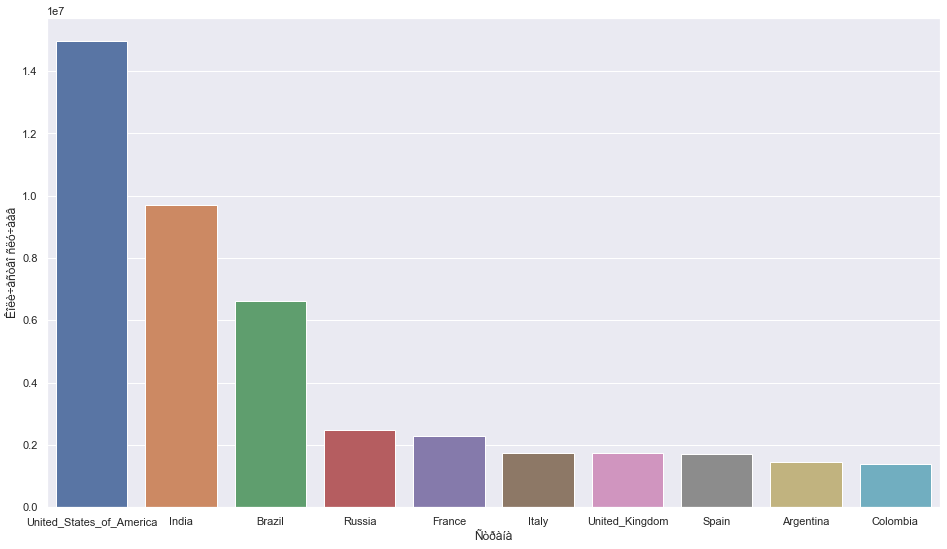

In [27]:
top_cases = covid.groupby('countriesAndTerritories')['cases']\
                          .sum().sort_values(ascending = False)
print('Топ 10 стран по количеству случаев:\n', top_cases[:10])

sns.set()
sns.barplot(x = top_cases[:10].index, y = top_cases[:10])
plt.xlabel('Страна')
plt.ylabel('Количество случаев')
plt.show()

Топ 10 стран по количеству случаев:
 countriesAndTerritories
United_States_of_America    14954332.0
India                        9703770.0
Brazil                       6623911.0
Russia                       2488912.0
France                       2297019.0
Italy                        1743002.5
United_Kingdom               1737960.0
Spain                        1707110.5
Argentina                    1466309.0
Colombia                     1377100.0
Name: cases, dtype: float64


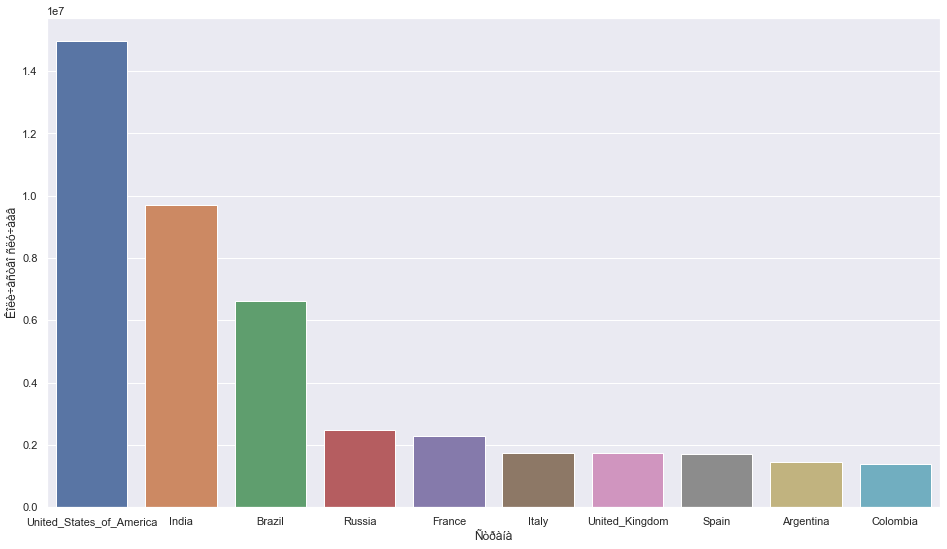

In [30]:
top_cases = covid.groupby('countriesAndTerritories')['cases']\
                          .sum().nlargest(10)
print('Топ 10 стран по количеству случаев:\n', top_cases)

sns.set()
sns.barplot(x = top_cases[:10].index, y = top_cases[:10])
plt.xlabel('Страна')
plt.ylabel('Количество случаев')
plt.show()

3.Повторите второй пункт для количества случаев на 1000 человек. (5 баллов)

Топ 10 стран по количеству случаев на 1000 человек:


,cases per 1000
countriesAndTerritories,
United_States_of_America,45.444930
Spain,36.370205
France,34.277275
Argentina,32.744236
Brazil,31.385577
Italy,28.876998
Colombia,27.356282
United_Kingdom,26.077049
Russia,17.062271


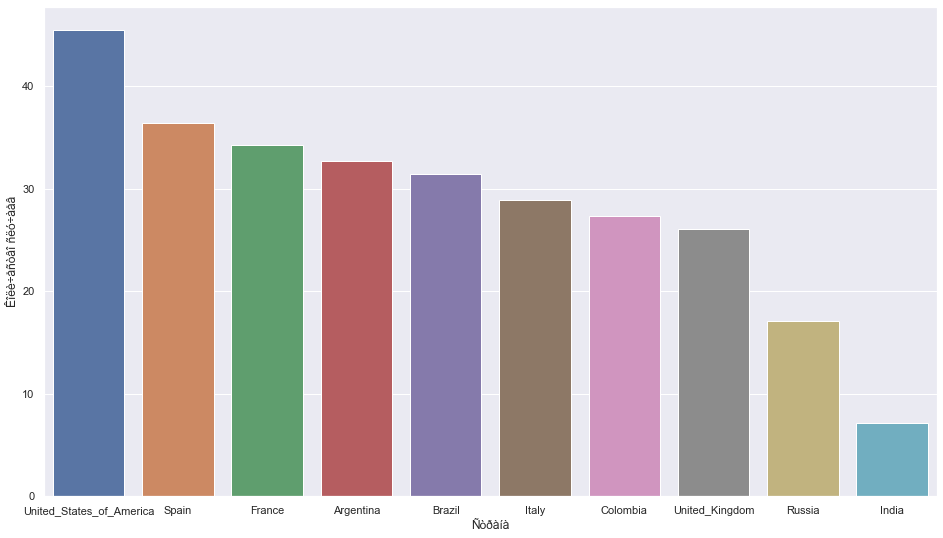

In [47]:
popdata = covid[['countriesAndTerritories', 'popData2019']]\
                 .drop_duplicates(subset = 'countriesAndTerritories')
top_cases_per_1000 = top_cases.reset_index().merge(popdata, how = 'inner', 
                                                   on = 'countriesAndTerritories')
top_cases_per_1000['cases per 1000'] = top_cases_per_1000['cases'] / top_cases_per_1000['popData2019'] * 1000
top_cases_per_1000 = top_cases_per_1000[['countriesAndTerritories', 'cases per 1000']]\
                                         .sort_values(by = 'cases per 1000', ascending = False)

print('Топ 10 стран по количеству случаев на 1000 человек:')
display(top_cases_per_1000.set_index('countriesAndTerritories')[:10])

sns.barplot(x = top_cases_per_1000['countriesAndTerritories'][:10], 
                                   y = top_cases_per_1000['cases per 1000'][:10])
plt.xlabel('Страна')
plt.ylabel('Количество случаев')
plt.show()

4.Постройте два графика: 

- суммарное число ежедневных новых случаев в мире (2 балла)

- суммарное число ежедневных смертей в мире (2 балла)

Найдите дни с наибольшим количеством смертей и наибольшим числом новых случаев в мире (1 балл).



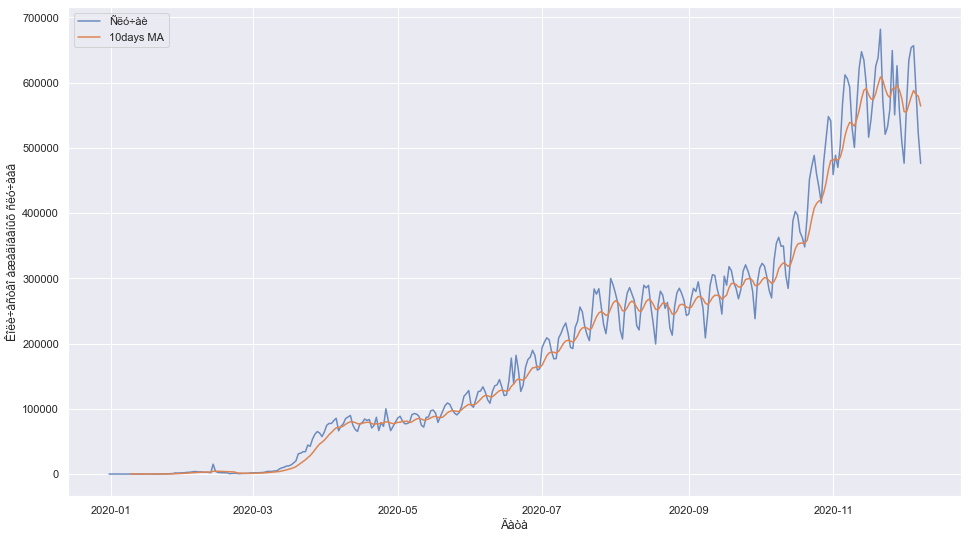

In [52]:
cases_world = covid.groupby('dateRep')['cases'].sum()
deaths_world = covid.groupby('dateRep')['deaths'].sum()

sns.set()
plt.plot(cases_world.index, cases_world, label = 'Случаи', alpha = 0.8)
plt.plot(cases_world.index, cases_world.rolling(window = 10).mean(), label = '10days MA')
plt.xlabel('Дата')
plt.ylabel('Количество ежедневных случаев')
plt.legend()
plt.show()

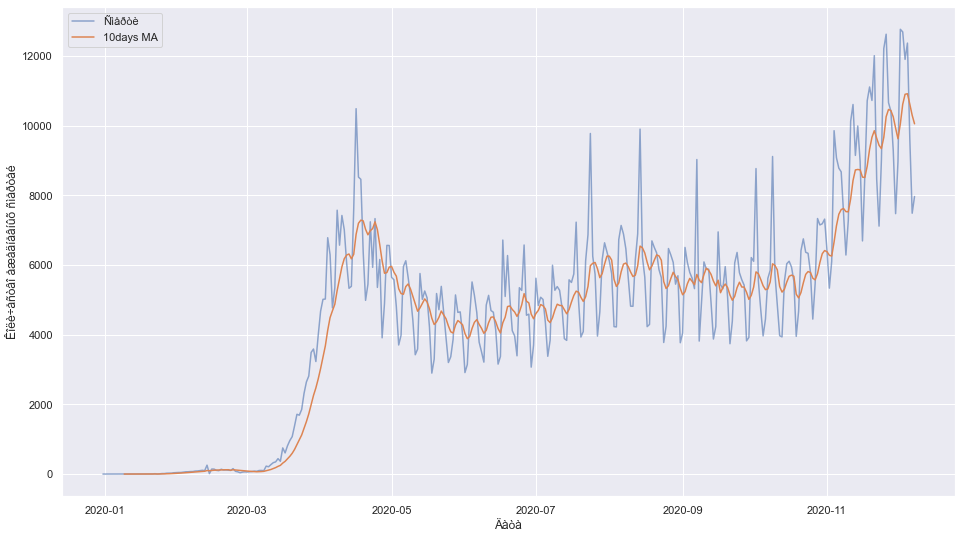

In [54]:
sns.set()
plt.plot(deaths_world.index, deaths_world, label = 'Смерти', alpha = 0.6)
plt.plot(deaths_world.index, deaths_world.rolling(window = 10).mean(), label = '10days MA')
plt.xlabel('Дата')
plt.ylabel('Количество ежедневных смертей')
plt.legend()
plt.show()

In [55]:
# Дни с наибольшим количеством случаев и смертей в мире
print('Макс. кол-во случаев:', cases_world.index[cases_world.argmax()].date())
print('Макс. кол-во смертей:', deaths_world.index[deaths_world.argmax()].date())

Макс. кол-во случаев: 2020-11-21
Макс. кол-во смертей: 2020-12-02


5.Выведите ежедневную динамику долей каждого континента в суммарном количестве новых случаев COVID-19 (5 баллов)

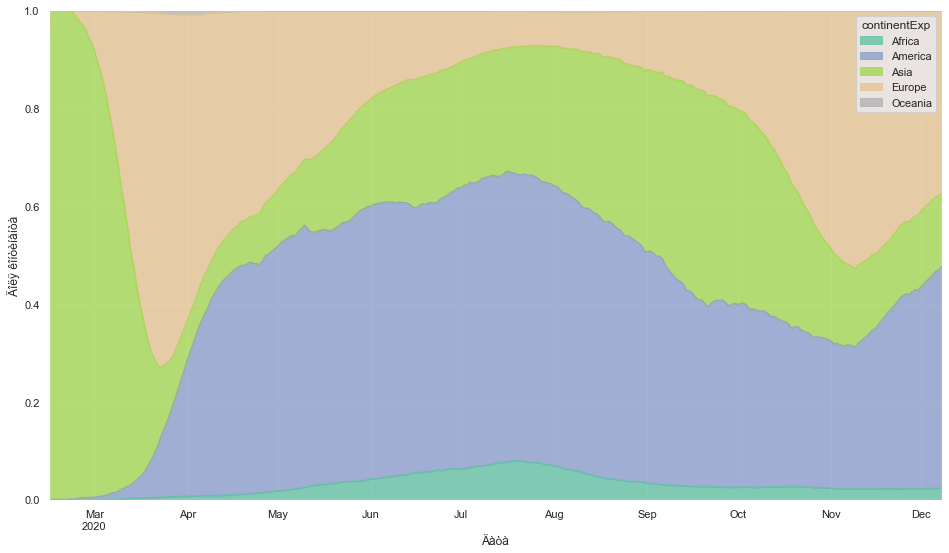

In [69]:
# Группируем данные по континентам и высчитываем доли на каждую дату
cases_by_cont = covid.groupby(['dateRep', 'continentExp'])['cases'].sum().unstack()
cases_by_cont = cases_by_cont.drop('Other', axis = 1)\
                             .apply(lambda x: x / np.sum(x), axis = 1)

# Добавляем 15-дневное сглаживание, чтобы не было пиков
cases_by_cont.loc['2020-02-01':].rolling(15).mean().plot\
                                .area(alpha = 0.8, colormap = 'Set2')
plt.ylim([0, 1])
plt.xlim(['2020-02-15', cases_by_cont.index.max()])
plt.xlabel('Дата')
plt.ylabel('Доля континента')
plt.show()

In [70]:
iso_correspnds = dict(zip(covid['countriesAndTerritories'].unique().tolist(),
     covid['countryterritoryCode'].unique().tolist()))
iso_correspnds['Colombia']

'COL'